In [1]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# import dask.dataframe as dd
# from mpl_interactions import ioff, panhandler, zoom_factory

import re


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [35]:
# Make a 3D view of the track
%matplotlib widget

def PlotEvent(axis, file_, title, eid):

    hits = pd.read_hdf(file_, 'MC/hits')
    event_hits = hits[hits.event_id == eid]

    # Create 3D axes
    ax = fig.add_subplot(axis)

    fig.set_facecolor('white')
    ax.set_facecolor('white')
    # ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_z+3000, s=50)
    ax.scatter(event_hits.x, event_hits.y,c= event_hits.energy, cmap='Spectral', s=10, label = "reco hits")

    ax.set_xlabel("x [mm]", fontsize = 15)
    ax.set_ylabel("y [mm]", fontsize = 15)
    plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # # Set the color of the spines (borders) to white
    # ax.spines['bottom'].set_color('white')
    # ax.spines['top'].set_color('white')
    # ax.spines['right'].set_color('white')
    # ax.spines['left'].set_color('white')
    ax.set_title(title, fontsize = 15, color='black')

    fig.tight_layout()





,event_id,x,y,z,energy
0,25,1153.850464,1235.123657,279.398895,0.006721
1,25,1147.510254,1234.022705,280.022003,0.079137
2,25,1158.839233,1229.376099,280.995178,0.008085
3,25,1157.063477,1233.405151,281.399445,0.002083
4,25,1161.970093,1228.559570,282.023834,0.000744
...,...,...,...,...,...
5938,30,1804.470215,2045.073364,3948.205566,0.020361
5939,30,1798.302612,2038.284058,3948.219971,0.002926
5940,30,1815.288574,2051.776367,3948.339111,0.002034
5941,30,1796.135498,2036.419434,3948.476807,0.000074


25


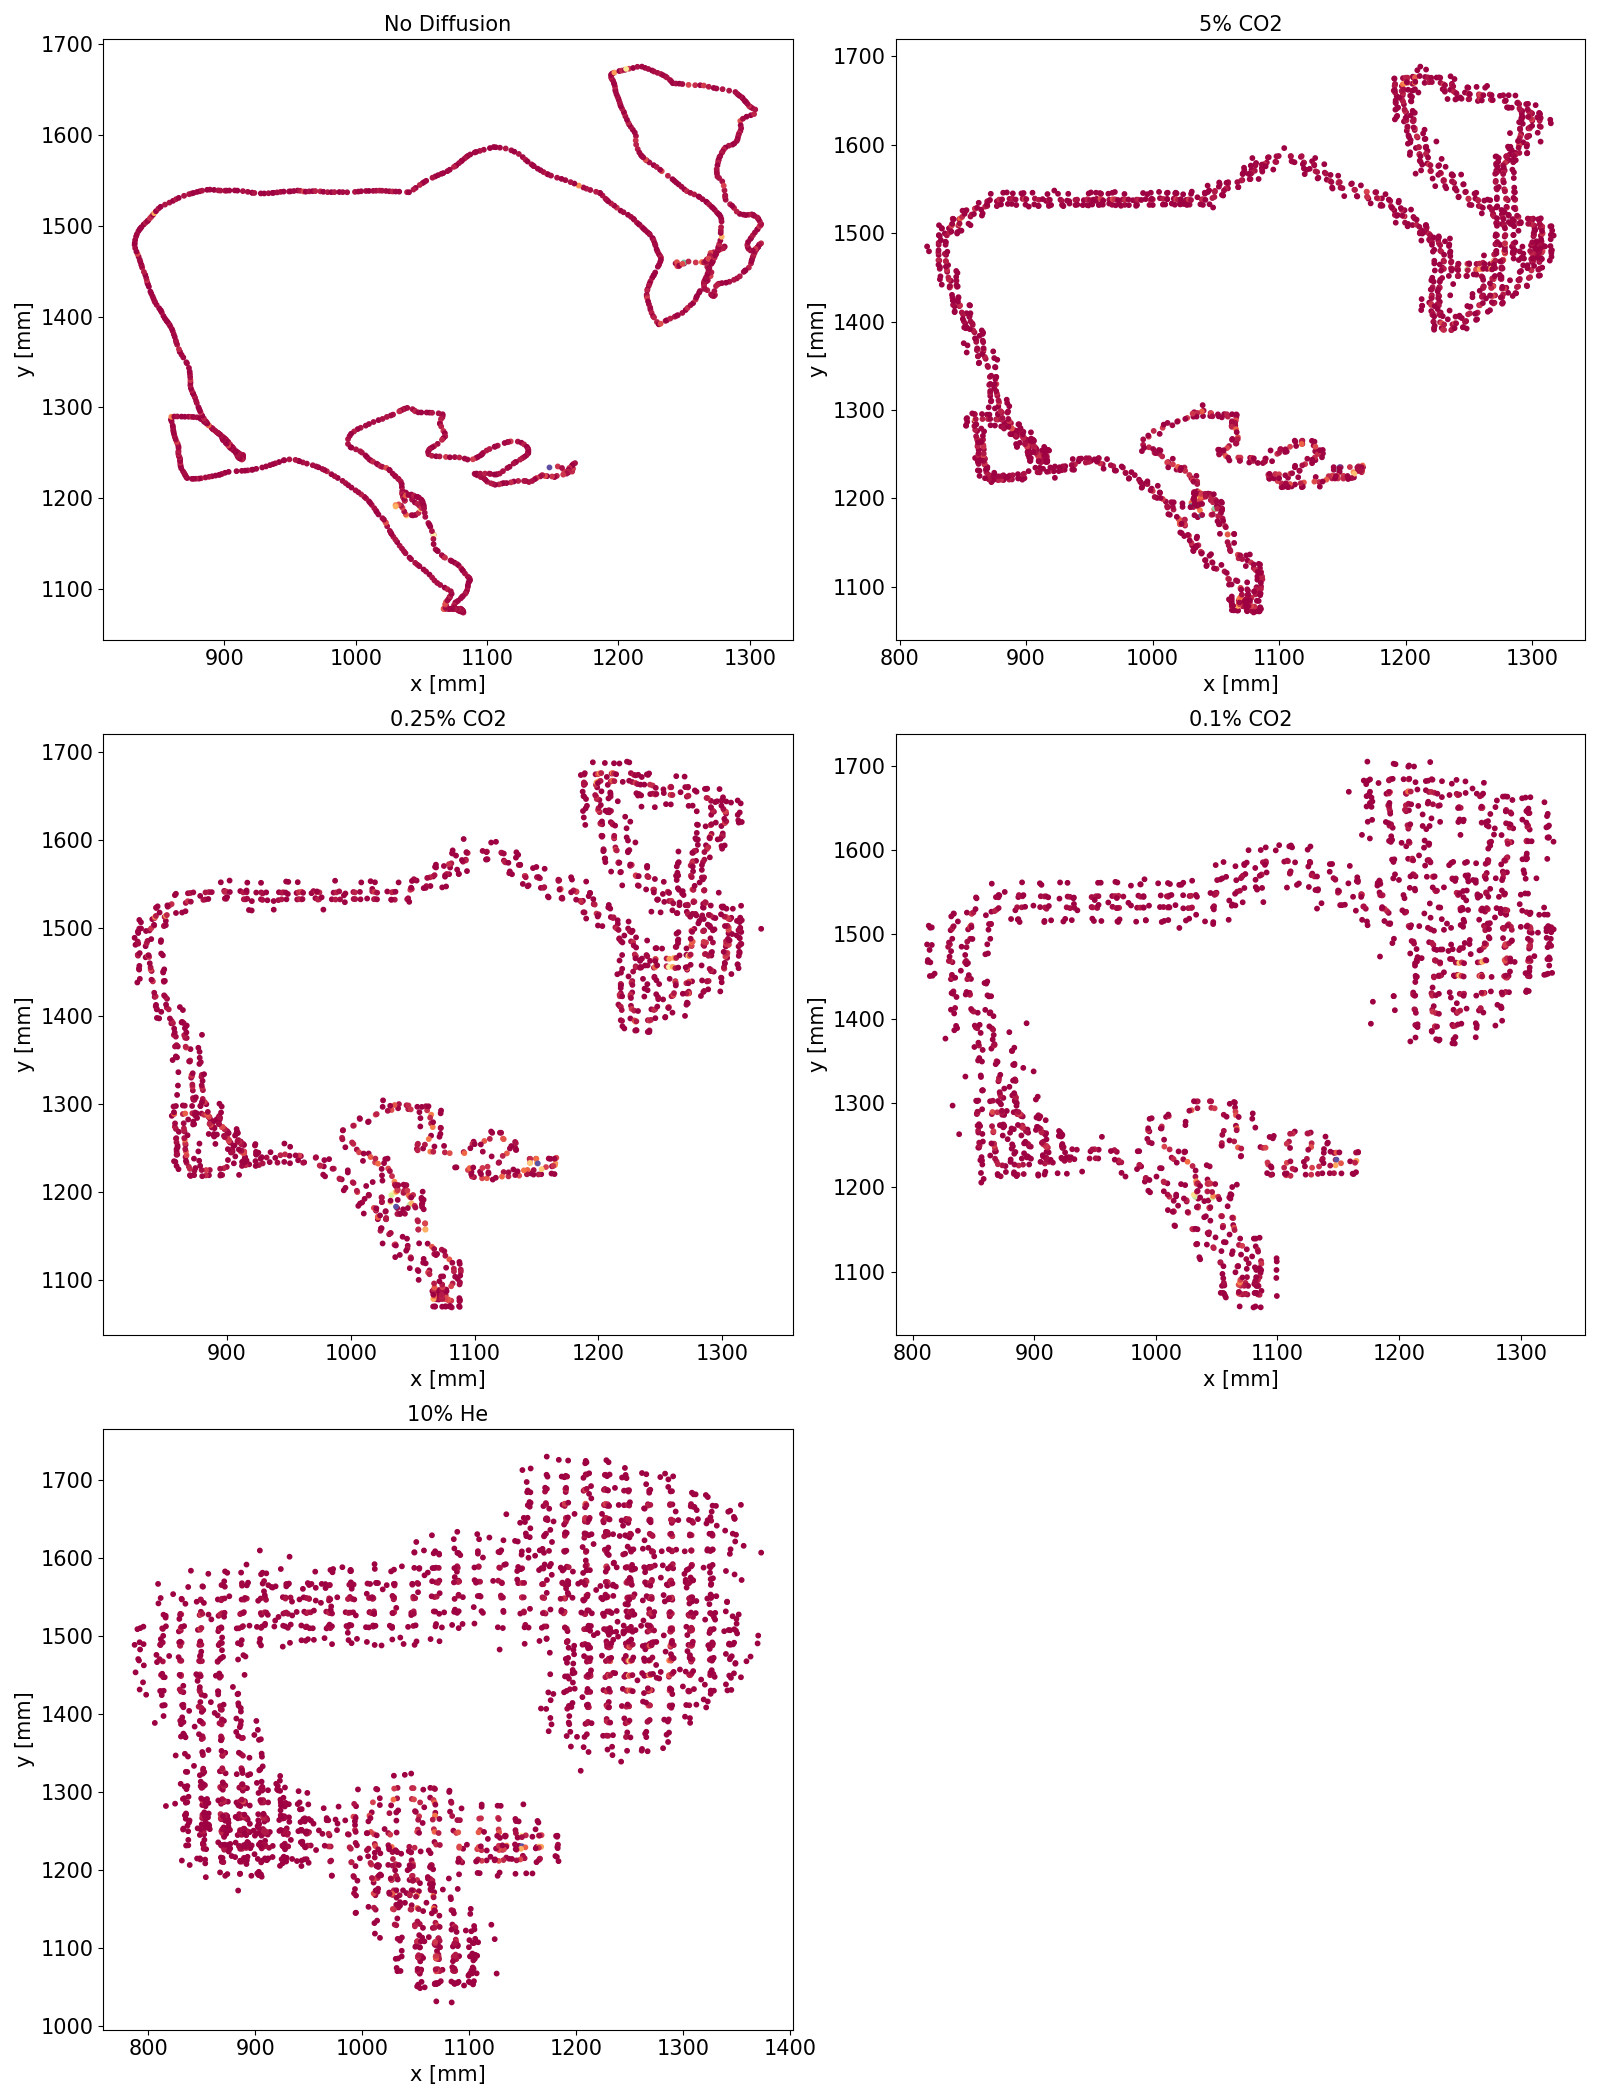

In [82]:


fig  = plt.figure(figsize=(16, 7*3))

file_num = "1"
mode="0nubb"
# mode="Tl"
# mode="Bi"


hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", 'MC/hits')
display(hits)
eid = hits["event_id"].unique()[0]
print(eid)


PlotEvent(321, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_Efilt_smear_{file_num}.h5", "No Diffusion", eid)
PlotEvent(322, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_Efilt_5.0percent_smear_{file_num}.h5", "5% CO2", eid)
PlotEvent(323, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_Efilt_0.25percent_smear_{file_num}.h5", "0.25% CO2", eid)
PlotEvent(324, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_Efilt_0.1percent_smear_{file_num}.h5", "0.1% CO2", eid)
PlotEvent(325, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_Efilt_0.05percent_smear_{file_num}.h5", "10% He", eid)



In [4]:
def PlotEvent3D(axis, file_, title, eid):
    hits = pd.read_hdf(file_, 'MC/hits')
    event_hits = hits[hits.event_id == eid]

    # Create 3D axes
    ax = fig.add_subplot(axis, projection='3d')

    fig.set_facecolor('white')
    ax.set_facecolor('white')

    # Scatter plot in 3D
    sc = ax.scatter(event_hits.x, event_hits.y, event_hits.z, 
                    c=event_hits.energy, cmap='Spectral', s=10, label="Reco hits")

    ax.set_xlabel("X [mm]", fontsize=15, color='black')
    ax.set_ylabel("Y [mm]", fontsize=15, color='black')
    ax.set_zlabel("Z [mm]", fontsize=15, color='black')

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.zaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.tick_params(axis='z', colors='black')

    ax.set_title(title, fontsize=15, color='black')

    # Set dark theme
    # ax.xaxis.pane.set_edgecolor("black")
    # ax.yaxis.pane.set_edgecolor("black")
    # ax.zaxis.pane.set_edgecolor("black")
    ax.grid(False)

    # Add colorbar
    cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, pad=0.09)
    cbar.set_label("Energy", fontsize=12, color='black')
    cbar.ax.yaxis.set_tick_params(color='black')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

    # Remove background (axis)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

fig = plt.figure(figsize=(16, 21))

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(321, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", "No Diffusion", eid)
PlotEvent3D(322, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_5.0percent_smear_{file_num}.h5", "5% CO2", eid)
PlotEvent3D(323, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_0.25percent_smear_{file_num}.h5", "0.25% CO2", eid)
PlotEvent3D(324, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_0.1percent_smear_{file_num}.h5", "0.1% CO2", eid)
PlotEvent3D(325, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_0.05percent_smear_{file_num}.h5", "10% He", eid)

plt.savefig("plots/Technote/DiffusionEvd.png", dpi=500)

NameError: name 'mode' is not defined

<Figure size 1600x2100 with 0 Axes>

25
16
16
14


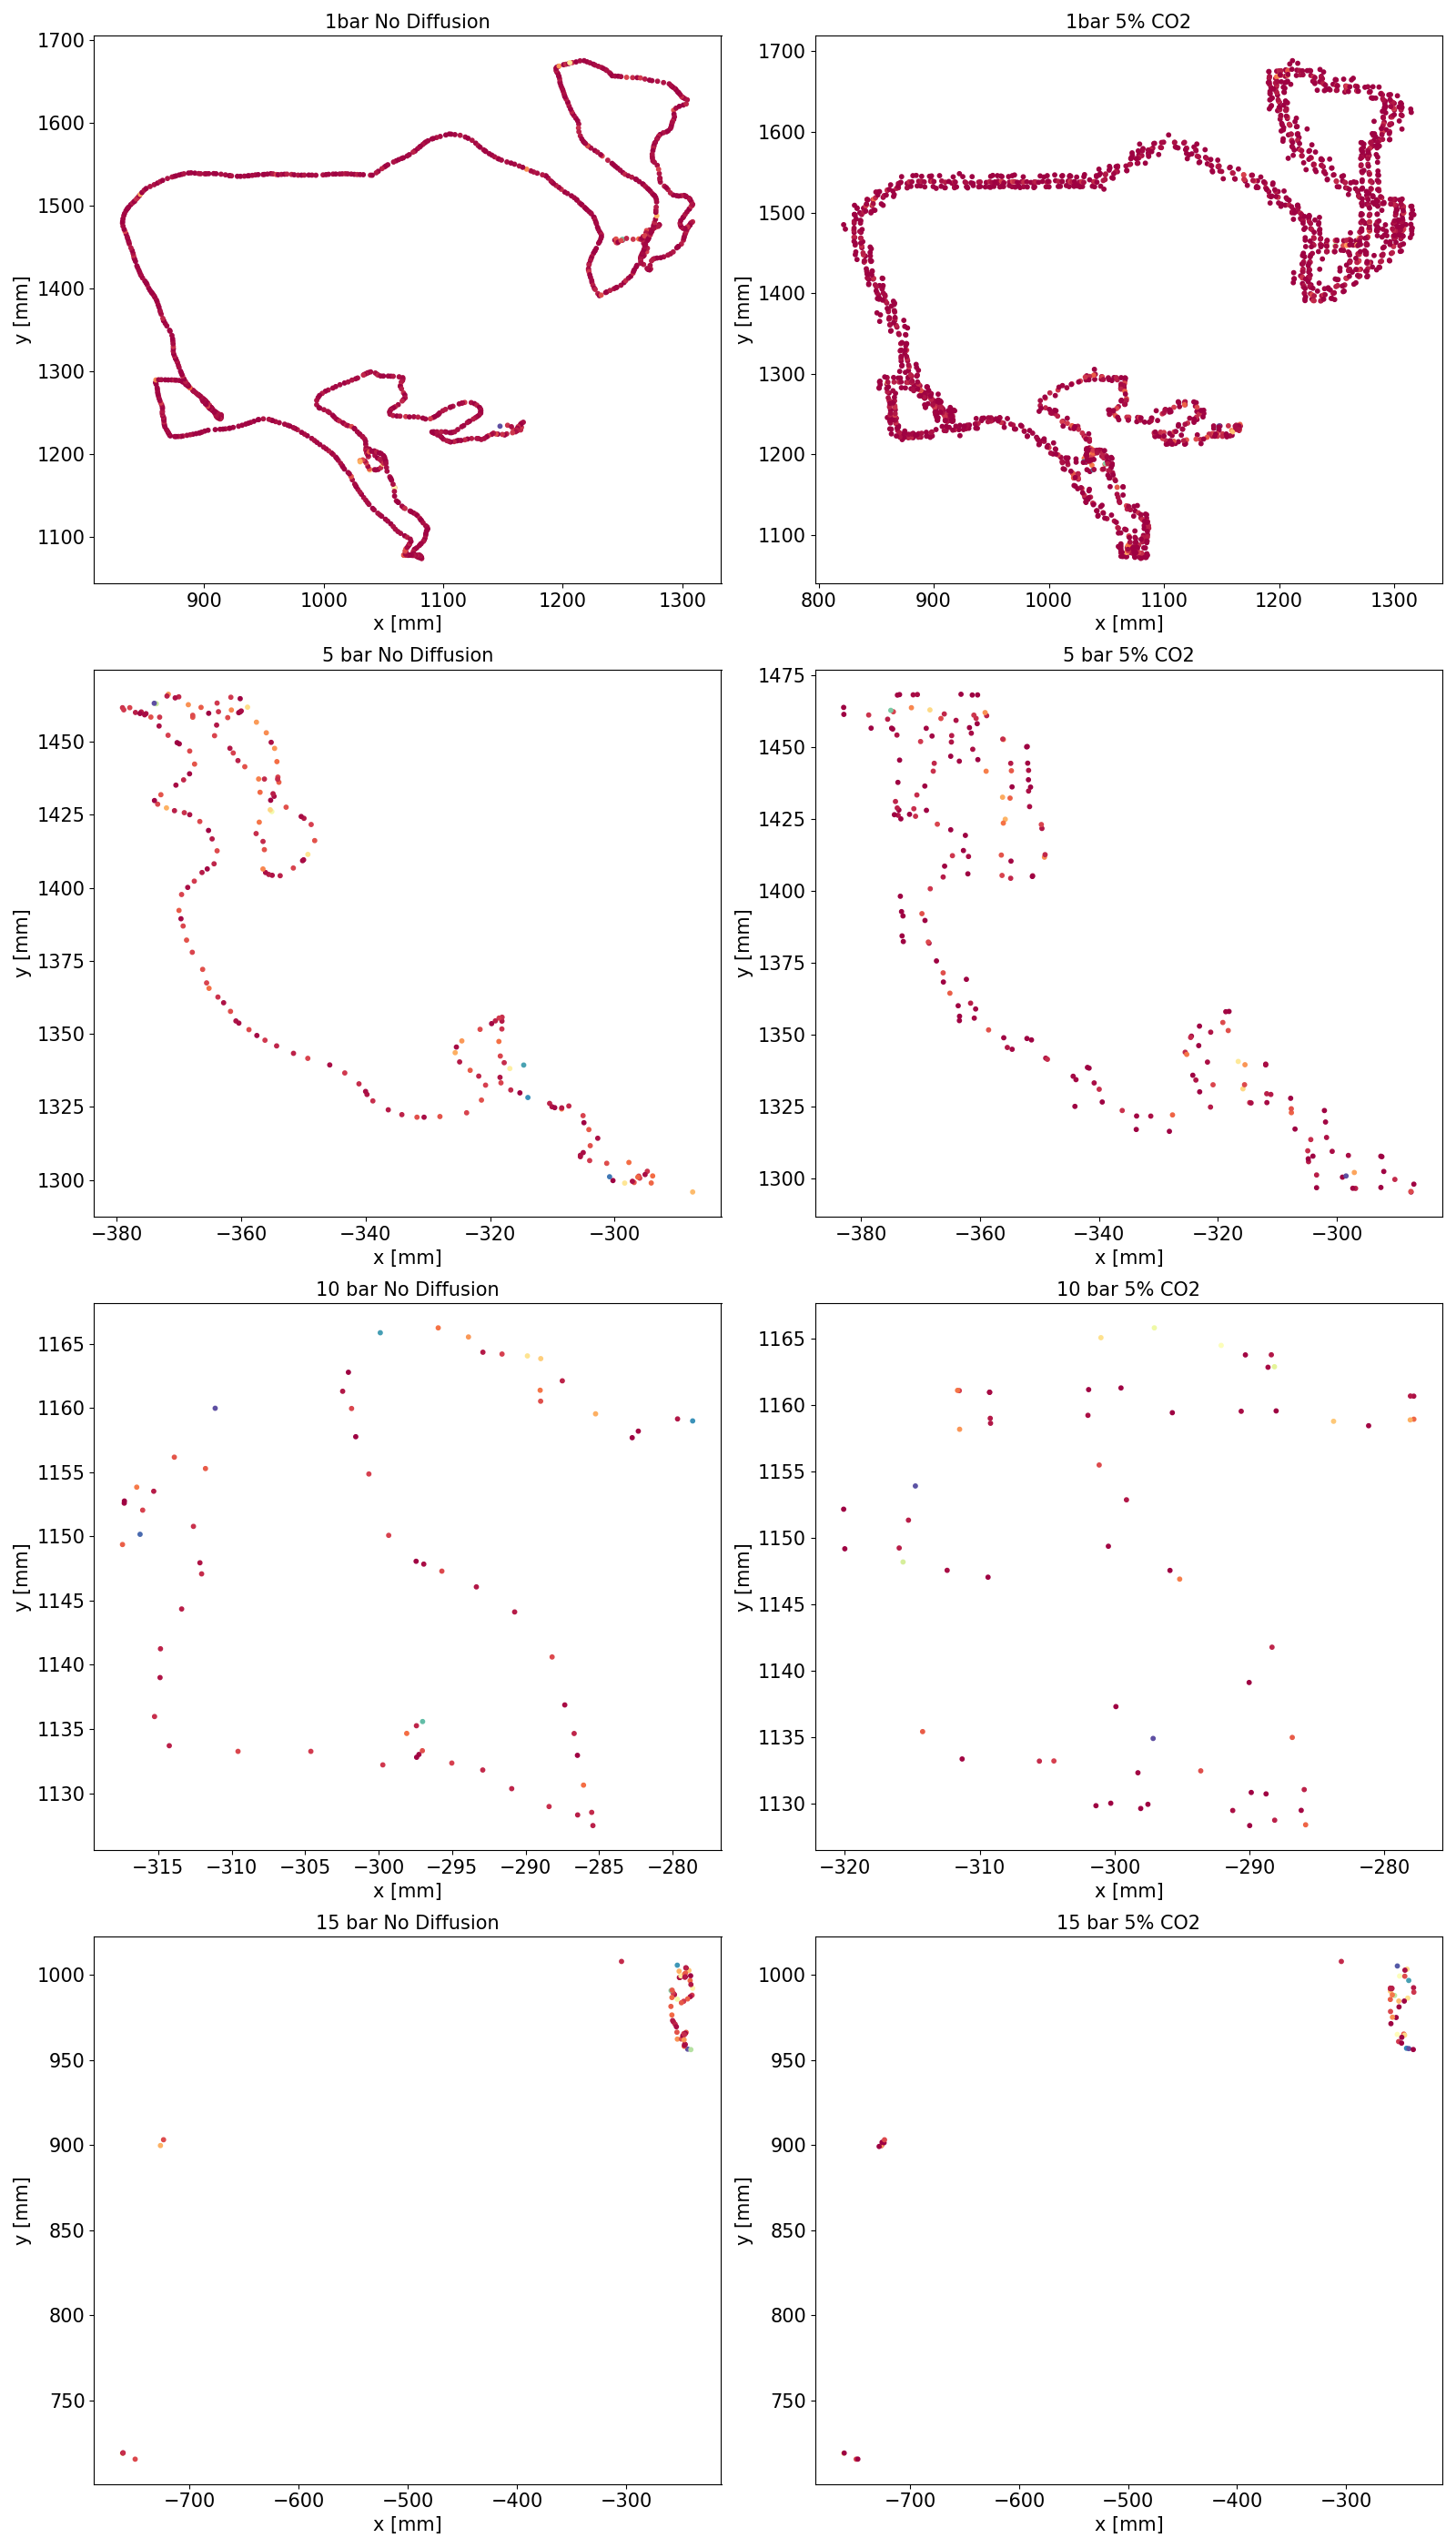

In [46]:


fig  = plt.figure(figsize=(16, 7*4))


hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(421, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", "1bar No Diffusion", eid)
PlotEvent(422, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_5.0percent_smear_{file_num}.h5", "1bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(423, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_smear_{file_num}.h5", "5 bar No Diffusion", eid)
PlotEvent(424, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_5.0percent_smear_{file_num}.h5", "5 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode }_10bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(425, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_EFilt_smear_{file_num}.h5", "10 bar No Diffusion", eid)
PlotEvent(426, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_EFilt_5.0percent_smear_{file_num}.h5", "10 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(427, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_smear_{file_num}.h5", "15 bar No Diffusion", eid)
PlotEvent(428, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_5.0percent_smear_{file_num}.h5", "15 bar 5% CO2", eid)




25
16
16
14


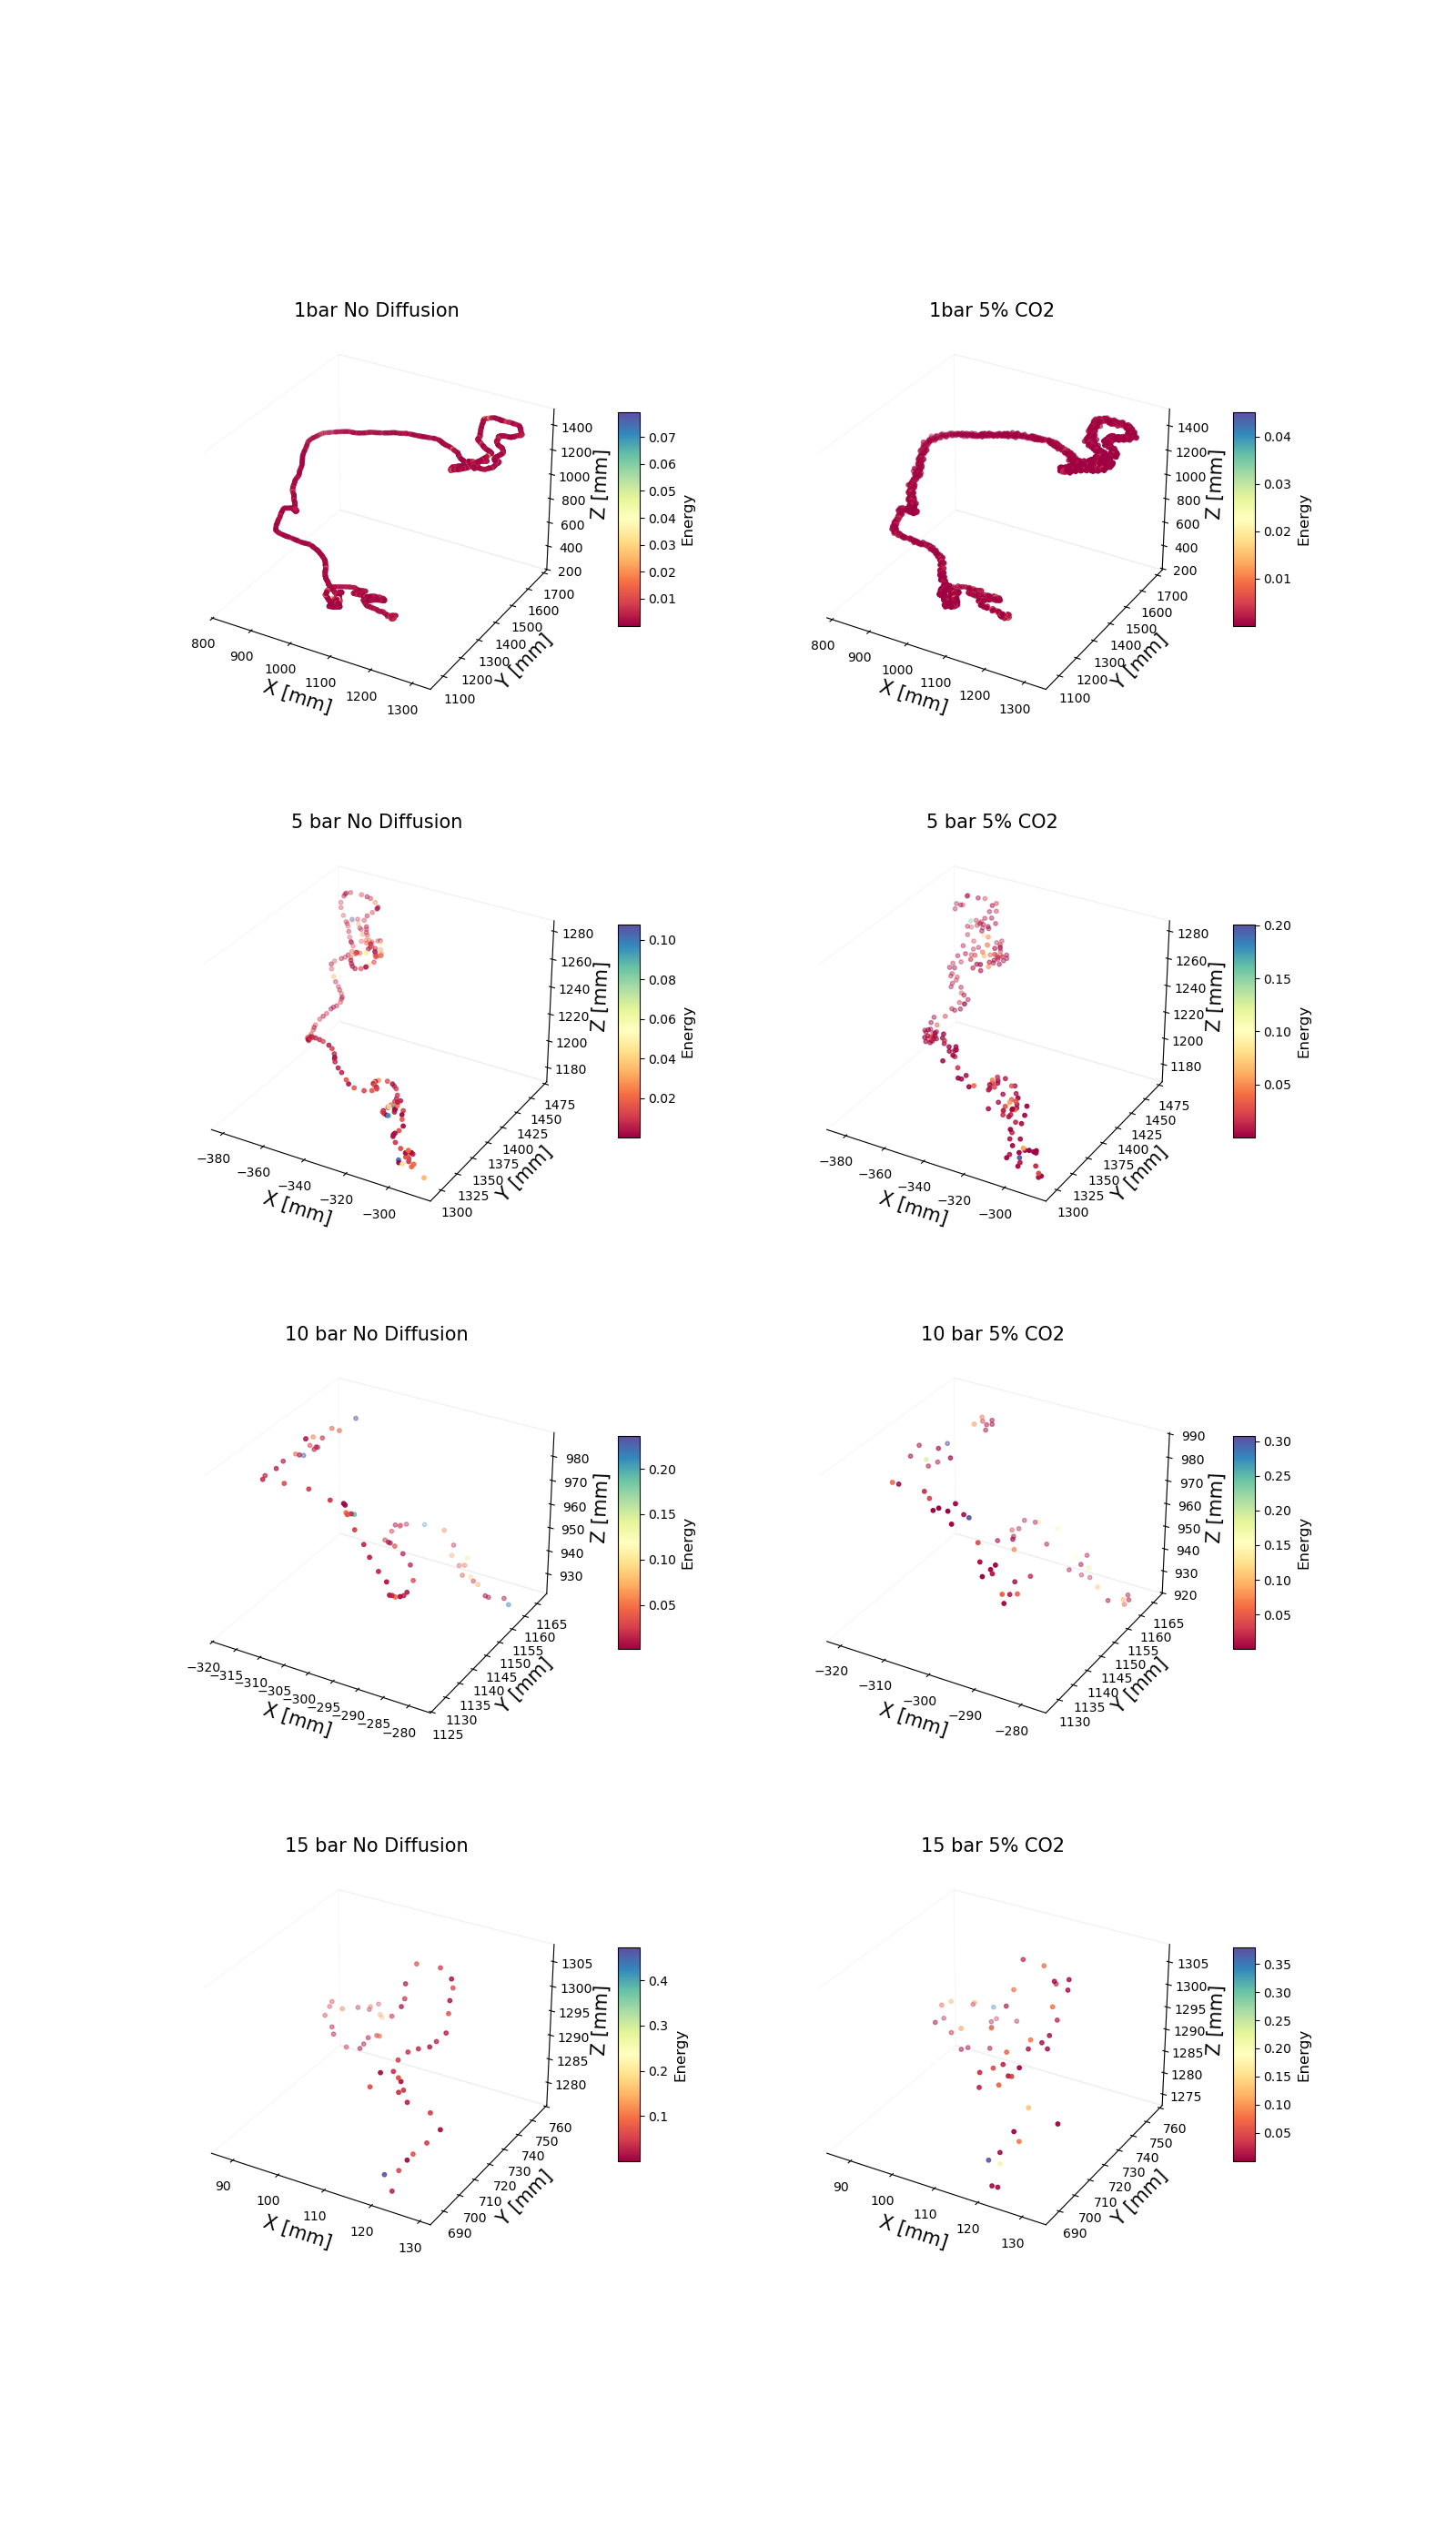

In [74]:


fig  = plt.figure(figsize=(16, 7*4))

percent=5.0

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(421, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_smear_{file_num}.h5", "1bar No Diffusion", eid)
PlotEvent3D(422, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_{percent}percent_smear_{file_num}.h5", "1bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(423, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_smear_{file_num}.h5", "5 bar No Diffusion", eid)
PlotEvent3D(424, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_{percent}percent_smear_{file_num}.h5", "5 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode }_10bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(425, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_EFilt_smear_{file_num}.h5", "10 bar No Diffusion", eid)
PlotEvent3D(426, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_EFilt_{percent}percent_smear_{file_num}.h5", "10 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(427, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_smear_{file_num}.h5", "15 bar No Diffusion", eid+1)
PlotEvent3D(428, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_{percent}percent_smear_{file_num}.h5", "15 bar 5% CO2", eid+1)



In [3]:
fig  = plt.figure(figsize=(12, 7*4))

percent = 5.0
# percent = 0.05

if percent == 5.0:
    label="5% C02"
    name="CO2"
else:
    label = "10% He"
    name="He"

PlotEvent3D(421, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_EFilt_{percent}percent_smear_{file_num}.h5", f"1bar {label}", 25)
PlotEvent3D(422, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_EFilt_{percent}percent_smear_{file_num}.h5", f"5 bar {label}", 17)
PlotEvent3D(423, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_EFilt_{percent}percent_smear_{file_num}.h5", f"10 bar {label}", 16)
PlotEvent3D(424, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_EFilt_{percent}percent_smear_{file_num}.h5", f"15 bar {label}", 15)
PlotEvent3D(425, f"../data/ATPC_{mode}/ATPC_{mode}_25bar_EFilt_{percent}percent_smear_{file_num}.h5", f"25 bar {label}", 15)

plt.savefig(f"plots/Technote/PressureEvd_{name}.png", dpi=500)

NameError: name 'PlotEvent3D' is not defined

<Figure size 1200x2800 with 0 Axes>

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1,50,1,e-,1,0,-181989.265625,-111225.281250,94323.421875,0.0,-181958.031250,...,0.161387,1.949897,-0.112060,-0.000000,-0.000000,-0.000000,1.514297,431.368439,none,eIoni
25,51,1,e-,1,0,114646.406250,-151470.218750,244521.625000,0.0,114646.406250,...,-2.024878,-0.301141,-1.486579,-2.024878,-0.301141,-1.486579,2.070058,0.000000,none,Transportation
27,52,1,e-,1,0,-58725.117188,139977.359375,-187980.812500,0.0,-58735.687500,...,0.587938,-0.042186,0.491007,0.000000,-0.000000,0.000000,0.410770,83.945366,none,eIoni
44,53,1,e-,1,0,212042.656250,24826.787109,15709.596680,0.0,212042.656250,...,-0.542357,0.876225,-2.604697,-0.542357,0.876225,-2.604697,2.336366,0.000000,none,Transportation
46,54,1,e-,1,0,235977.187500,35272.671875,-101483.601562,0.0,235808.109375,...,-1.936107,-0.887012,1.604264,-0.000000,-0.000000,0.000000,2.203791,759.955994,none,eIoni
69,55,1,e-,1,0,205697.031250,51050.695312,166910.109375,0.0,205740.343750,...,-2.165481,-1.334659,-1.143667,0.000000,0.000000,0.000000,2.324441,470.177612,none,eIoni
87,56,1,e-,1,0,-133499.234375,129418.421875,-198787.625000,0.0,-133498.140625,...,0.055901,-0.043628,0.479319,0.000000,0.000000,0.000000,0.193199,33.029285,none,eIoni
90,57,1,e-,1,0,-32842.398438,133455.562500,222433.203125,0.0,-32841.933594,...,0.140333,-0.169809,-0.122056,0.000000,-0.000000,-0.000000,0.058690,4.800681,none,eIoni
92,58,1,e-,1,0,178349.125000,19556.648438,157303.609375,0.0,178345.437500,...,-0.417481,-0.515473,-0.055662,-0.000000,-0.000000,0.000000,0.328180,64.890884,none,eIoni
133,59,1,e-,1,0,-88146.257812,248954.796875,-225039.359375,0.0,-88088.390625,...,1.251389,-0.377258,1.204414,-0.000000,0.000000,0.000000,1.338334,387.141479,none,eIoni


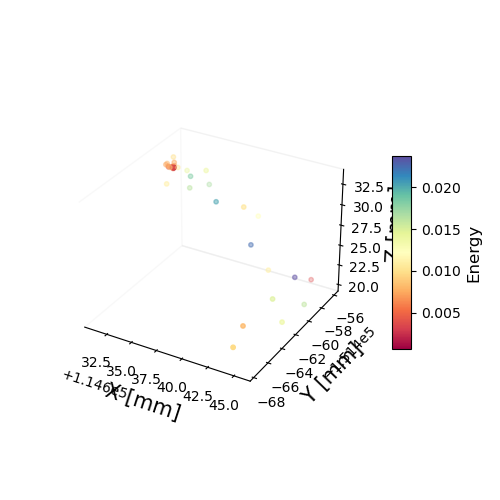

In [14]:

%matplotlib widget
fig = plt.figure(figsize=(5, 5))
parts = pd.read_hdf("../data/test/ATPC_BSM.h5", "MC/particles")
parts = parts[parts.particle_id == 1]
display(parts)
PlotEvent3D(111, f"../data/test/ATPC_BSM.h5", "", 51)